<a href="https://colab.research.google.com/github/rgvbc567/EDA/blob/EDA_143pages_banking_finance/credit_eda_case_study.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

## Credit EDA Case Study

In [1]:
import numpy as np
import pandas as pd 
import matplotlib.pyplot as plt
import plotly.express as px
import plotly as ply
import seaborn as sns
import warnings
import plotly.graph_objects as go
import plotly.offline as po
from plotly.offline import download_plotlyjs, init_notebook_mode, plot, iplot
import plotly.express as px
import plotly.figure_factory as ff
from plotly.subplots import make_subplots
warnings.filterwarnings('ignore')
import plotly.io as pio
pio.renderers.default = 'iframe'
pio.templates.default = "plotly_dark"

### Explore Dataset

In [3]:
app_data =pd.read_csv("application_data.csv");
app_data.head()

,SK_ID_CURR,TARGET,NAME_CONTRACT_TYPE,CODE_GENDER,FLAG_OWN_CAR,FLAG_OWN_REALTY,CNT_CHILDREN,AMT_INCOME_TOTAL,AMT_CREDIT,AMT_ANNUITY,...,FLAG_DOCUMENT_18,FLAG_DOCUMENT_19,FLAG_DOCUMENT_20,FLAG_DOCUMENT_21,AMT_REQ_CREDIT_BUREAU_HOUR,AMT_REQ_CREDIT_BUREAU_DAY,AMT_REQ_CREDIT_BUREAU_WEEK,AMT_REQ_CREDIT_BUREAU_MON,AMT_REQ_CREDIT_BUREAU_QRT,AMT_REQ_CREDIT_BUREAU_YEAR
0,100002,1,Cash loans,M,N,Y,0,202500.0,406597.5,24700.5,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0
1,100003,0,Cash loans,F,N,N,0,270000.0,1293502.5,35698.5,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,100004,0,Revolving loans,M,Y,Y,0,67500.0,135000.0,6750.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3,100006,0,Cash loans,F,N,Y,0,135000.0,312682.5,29686.5,...,0.0,0.0,0.0,0.0,NaN,NaN,NaN,NaN,NaN,NaN
4,100007,0,Cash loans,M,N,Y,0,121500.0,513000.0,21865.5,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [4]:
app_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9692 entries, 0 to 9691
Columns: 122 entries, SK_ID_CURR to AMT_REQ_CREDIT_BUREAU_YEAR
dtypes: float64(103), int64(3), object(16)
memory usage: 9.0+ MB


In [5]:
app_data.shape # 122 Columns 

(9692, 122)

In [6]:
# Summary of numeric columns
app_data.describe()

,SK_ID_CURR,TARGET,CNT_CHILDREN,AMT_INCOME_TOTAL,AMT_CREDIT,AMT_ANNUITY,AMT_GOODS_PRICE,REGION_POPULATION_RELATIVE,DAYS_BIRTH,DAYS_EMPLOYED,...,FLAG_DOCUMENT_18,FLAG_DOCUMENT_19,FLAG_DOCUMENT_20,FLAG_DOCUMENT_21,AMT_REQ_CREDIT_BUREAU_HOUR,AMT_REQ_CREDIT_BUREAU_DAY,AMT_REQ_CREDIT_BUREAU_WEEK,AMT_REQ_CREDIT_BUREAU_MON,AMT_REQ_CREDIT_BUREAU_QRT,AMT_REQ_CREDIT_BUREAU_YEAR
count,9692.000000,9692.000000,9692.000000,9.692000e+03,9.692000e+03,9692.000000,9.685000e+03,9692.000000,9691.000000,9691.000000,...,9691.000000,9691.000000,9691.000000,9691.000000,8376.000000,8376.000000,8376.000000,8376.000000,8376.000000,8376.000000
mean,105652.346574,0.077899,0.415600,1.676262e+05,6.013997e+05,27100.230396,5.410311e+05,0.020931,-16029.072129,62808.813435,...,0.007017,0.000413,0.000516,0.000310,0.007402,0.008118,0.033190,0.276624,0.268983,1.888968
std,3256.587947,0.268027,0.718289,9.466657e+04,4.040238e+05,14419.822666,3.714979e+05,0.013922,4342.680723,140461.490262,...,0.083476,0.020313,0.022710,0.017593,0.088464,0.118421,0.194483,0.932214,0.614159,1.862072
min,100002.000000,0.000000,0.000000,2.565000e+04,4.500000e+04,2596.500000,4.500000e+04,0.000000,-25160.000000,-15632.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,102827.750000,0.000000,0.000000,1.125000e+05,2.700000e+05,16434.000000,2.385000e+05,0.010006,-19605.000000,-2822.500000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,105665.500000,0.000000,0.000000,1.440000e+05,5.123925e+05,24970.500000,4.500000e+05,0.018850,-15782.000000,-1229.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000
75%,108462.250000,0.000000,1.000000,2.025000e+05,8.100000e+05,34671.375000,6.840000e+05,0.028663,-12401.000000,-293.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,3.000000
max,111275.000000,1.000000,7.000000,1.935000e+06,2.961000e+06,135936.000000,2.961000e+06,0.072508,-7705.000000,365243.000000,...,1.000000,1.000000,1.000000,1.000000,2.000000,4.000000,4.000000,16.000000,8.000000,13.000000


In [7]:
# Most of the columns are of type integer or float. 
app_data.dtypes.value_counts()

float64    103
object      16
int64        3
dtype: int64

### Data Cleaning

#### Dropping Columns with high percentage of NULL values

In [8]:
# Percentage of NULL Values in descending order 
(app_data.isnull().mean()*100).sort_values(ascending=False)

COMMONAREA_MODE               69.696657
COMMONAREA_AVG                69.696657
COMMONAREA_MEDI               69.696657
NONLIVINGAPARTMENTS_MODE      69.335534
NONLIVINGAPARTMENTS_AVG       69.335534
                                ...    
NAME_FAMILY_STATUS             0.000000
NAME_HOUSING_TYPE              0.000000
REGION_POPULATION_RELATIVE     0.000000
TARGET                         0.000000
SK_ID_CURR                     0.000000
Length: 122, dtype: float64

In [9]:
# Columns with NULL Values greater than 40%
s1= (app_data.isnull().mean()*100).sort_values(ascending=False)[app_data.isnull().mean()*100 > 40]
s1

COMMONAREA_MODE                 69.696657
COMMONAREA_AVG                  69.696657
COMMONAREA_MEDI                 69.696657
NONLIVINGAPARTMENTS_MODE        69.335534
NONLIVINGAPARTMENTS_AVG         69.335534
NONLIVINGAPARTMENTS_MEDI        69.335534
FONDKAPREMONT_MODE              68.520429
LIVINGAPARTMENTS_AVG            68.355345
LIVINGAPARTMENTS_MODE           68.355345
LIVINGAPARTMENTS_MEDI           68.355345
FLOORSMIN_MEDI                  67.870409
FLOORSMIN_MODE                  67.870409
FLOORSMIN_AVG                   67.870409
OWN_CAR_AGE                     66.694181
YEARS_BUILD_MEDI                66.364012
YEARS_BUILD_AVG                 66.364012
YEARS_BUILD_MODE                66.364012
LANDAREA_MODE                   58.883615
LANDAREA_AVG                    58.883615
LANDAREA_MEDI                   58.883615
BASEMENTAREA_MEDI               58.099463
BASEMENTAREA_AVG                58.099463
BASEMENTAREA_MODE               58.099463
EXT_SOURCE_1                    56

In [10]:
fig= px.bar(data_frame=s1,
       x=s1.index.tolist(), 
       y=s1.values,
       color=s1.values, 
       text=s1.values.round()
      )
fig.update_traces(textposition='outside',marker_coloraxis=None)
fig.update_xaxes(title='Columns') 
fig.update_yaxes(title='Percentage')
fig.update_layout(
                    title=dict(text = "Null Value Percentage",x=0.5,y=0.95),
                    title_font_size=20,
                    showlegend=False,
                    height =600,
                  )
fig.show()

In [11]:
# Get Column names with NULL percentage greater than 40%
cols = (app_data.isnull().mean()*100 > 40)[app_data.isnull().mean()*100 > 40].index.tolist()
cols

['OWN_CAR_AGE',
 'EXT_SOURCE_1',
 'APARTMENTS_AVG',
 'BASEMENTAREA_AVG',
 'YEARS_BEGINEXPLUATATION_AVG',
 'YEARS_BUILD_AVG',
 'COMMONAREA_AVG',
 'ELEVATORS_AVG',
 'ENTRANCES_AVG',
 'FLOORSMAX_AVG',
 'FLOORSMIN_AVG',
 'LANDAREA_AVG',
 'LIVINGAPARTMENTS_AVG',
 'LIVINGAREA_AVG',
 'NONLIVINGAPARTMENTS_AVG',
 'NONLIVINGAREA_AVG',
 'APARTMENTS_MODE',
 'BASEMENTAREA_MODE',
 'YEARS_BEGINEXPLUATATION_MODE',
 'YEARS_BUILD_MODE',
 'COMMONAREA_MODE',
 'ELEVATORS_MODE',
 'ENTRANCES_MODE',
 'FLOORSMAX_MODE',
 'FLOORSMIN_MODE',
 'LANDAREA_MODE',
 'LIVINGAPARTMENTS_MODE',
 'LIVINGAREA_MODE',
 'NONLIVINGAPARTMENTS_MODE',
 'NONLIVINGAREA_MODE',
 'APARTMENTS_MEDI',
 'BASEMENTAREA_MEDI',
 'YEARS_BEGINEXPLUATATION_MEDI',
 'YEARS_BUILD_MEDI',
 'COMMONAREA_MEDI',
 'ELEVATORS_MEDI',
 'ENTRANCES_MEDI',
 'FLOORSMAX_MEDI',
 'FLOORSMIN_MEDI',
 'LANDAREA_MEDI',
 'LIVINGAPARTMENTS_MEDI',
 'LIVINGAREA_MEDI',
 'NONLIVINGAPARTMENTS_MEDI',
 'NONLIVINGAREA_MEDI',
 'FONDKAPREMONT_MODE',
 'HOUSETYPE_MODE',
 'TOTALAREA_MOD

In [12]:
# We are good to delete 49 columns because NULL percentage for these columns is greater than 40%
len(cols)

49

In [13]:
# Drop 49 columns
app_data.drop(columns=cols,inplace=True)

In [14]:
app_data.shape # 307511 rows & 73 Columns

(9692, 73)

In [15]:
# NULL Values percentage in new dataset
s2= (app_data.isnull().mean()*100).sort_values(ascending=False)
s2

OCCUPATION_TYPE               30.912092
EXT_SOURCE_3                  19.872059
AMT_REQ_CREDIT_BUREAU_YEAR    13.578209
AMT_REQ_CREDIT_BUREAU_QRT     13.578209
AMT_REQ_CREDIT_BUREAU_MON     13.578209
                                ...    
NAME_EDUCATION_TYPE            0.000000
NAME_HOUSING_TYPE              0.000000
REGION_POPULATION_RELATIVE     0.000000
TARGET                         0.000000
SK_ID_CURR                     0.000000
Length: 73, dtype: float64

In [16]:
s2.head(10)

OCCUPATION_TYPE               30.912092
EXT_SOURCE_3                  19.872059
AMT_REQ_CREDIT_BUREAU_YEAR    13.578209
AMT_REQ_CREDIT_BUREAU_QRT     13.578209
AMT_REQ_CREDIT_BUREAU_MON     13.578209
AMT_REQ_CREDIT_BUREAU_WEEK    13.578209
AMT_REQ_CREDIT_BUREAU_DAY     13.578209
AMT_REQ_CREDIT_BUREAU_HOUR    13.578209
DEF_30_CNT_SOCIAL_CIRCLE       0.423029
OBS_30_CNT_SOCIAL_CIRCLE       0.423029
dtype: float64

#### Imputation of Missing Values

In [17]:
app_data.head()

,SK_ID_CURR,TARGET,NAME_CONTRACT_TYPE,CODE_GENDER,FLAG_OWN_CAR,FLAG_OWN_REALTY,CNT_CHILDREN,AMT_INCOME_TOTAL,AMT_CREDIT,AMT_ANNUITY,...,FLAG_DOCUMENT_18,FLAG_DOCUMENT_19,FLAG_DOCUMENT_20,FLAG_DOCUMENT_21,AMT_REQ_CREDIT_BUREAU_HOUR,AMT_REQ_CREDIT_BUREAU_DAY,AMT_REQ_CREDIT_BUREAU_WEEK,AMT_REQ_CREDIT_BUREAU_MON,AMT_REQ_CREDIT_BUREAU_QRT,AMT_REQ_CREDIT_BUREAU_YEAR
0,100002,1,Cash loans,M,N,Y,0,202500.0,406597.5,24700.5,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0
1,100003,0,Cash loans,F,N,N,0,270000.0,1293502.5,35698.5,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,100004,0,Revolving loans,M,Y,Y,0,67500.0,135000.0,6750.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3,100006,0,Cash loans,F,N,Y,0,135000.0,312682.5,29686.5,...,0.0,0.0,0.0,0.0,NaN,NaN,NaN,NaN,NaN,NaN
4,100007,0,Cash loans,M,N,Y,0,121500.0,513000.0,21865.5,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [18]:
'''  
Impute the missing values of below columns with mode
- AMT_REQ_CREDIT_BUREAU_MONTH
- AMT_REQ_CREDIT_BUREAU_WEEK 
- AMT_REQ_CREDIT_BUREAU_DAY
- AMT_REQ_CREDIT_BUREAU_HOUR 
- AMT_REQ_CREDIT_BUREAU_QRT
'''
for i in s2.head(10).index.to_list():
    if 'AMT_REQ_CREDIT' in i:
        print('Most frequent value in {0} is : {1}'.format(i,app_data[i].mode()[0]))
        print('Imputing the missing value with : {0}'.format(app_data[i].mode()[0]))
        app_data[i].fillna(app_data[i].mode()[0],inplace=True)
        print('NULL Values in {0} after imputation : {1}'.format(i,app_data[i].isnull().sum()))
        print()

Most frequent value in AMT_REQ_CREDIT_BUREAU_YEAR is : 0.0
Imputing the missing value with : 0.0
NULL Values in AMT_REQ_CREDIT_BUREAU_YEAR after imputation : 0

Most frequent value in AMT_REQ_CREDIT_BUREAU_QRT is : 0.0
Imputing the missing value with : 0.0
NULL Values in AMT_REQ_CREDIT_BUREAU_QRT after imputation : 0

Most frequent value in AMT_REQ_CREDIT_BUREAU_MON is : 0.0
Imputing the missing value with : 0.0
NULL Values in AMT_REQ_CREDIT_BUREAU_MON after imputation : 0

Most frequent value in AMT_REQ_CREDIT_BUREAU_WEEK is : 0.0
Imputing the missing value with : 0.0
NULL Values in AMT_REQ_CREDIT_BUREAU_WEEK after imputation : 0

Most frequent value in AMT_REQ_CREDIT_BUREAU_DAY is : 0.0
Imputing the missing value with : 0.0
NULL Values in AMT_REQ_CREDIT_BUREAU_DAY after imputation : 0

Most frequent value in AMT_REQ_CREDIT_BUREAU_HOUR is : 0.0
Imputing the missing value with : 0.0
NULL Values in AMT_REQ_CREDIT_BUREAU_HOUR after imputation : 0



In [19]:
# Missing value percentage of remaining columns
(app_data.isnull().mean()*100).sort_values(ascending=False)

OCCUPATION_TYPE               30.912092
EXT_SOURCE_3                  19.872059
OBS_60_CNT_SOCIAL_CIRCLE       0.423029
OBS_30_CNT_SOCIAL_CIRCLE       0.423029
DEF_60_CNT_SOCIAL_CIRCLE       0.423029
                                ...    
FLAG_OWN_REALTY                0.000000
FLAG_OWN_CAR                   0.000000
CODE_GENDER                    0.000000
NAME_CONTRACT_TYPE             0.000000
AMT_REQ_CREDIT_BUREAU_YEAR     0.000000
Length: 73, dtype: float64

__Impute missing values for OCCUPATION_TYPE__

In [20]:
# We can impute missing values in 'OCCUPATION_TYPE' column with 'Laborers'
fig=px.bar(app_data.OCCUPATION_TYPE.value_counts(),color=app_data.OCCUPATION_TYPE.value_counts()) 
fig.update_traces(textposition='outside',marker_coloraxis=None)
fig.update_xaxes(title='Occupation Type') 
fig.update_yaxes(title='Count')
fig.update_layout(
                    title=dict(text = "Occupation Type Frequency",x=0.5,y=0.95),
                    title_font_size=20,
                    showlegend=False,
                    height =450,
                  )
fig.show()

In [21]:
app_data.OCCUPATION_TYPE.fillna('Laborers',inplace=True)

__Impute Missing values (XNA) in CODE_GENDER with mode__

In [22]:
app_data['CODE_GENDER'].value_counts()

F    6406
M    3286
Name: CODE_GENDER, dtype: int64

In [23]:
app_data['CODE_GENDER'].replace(to_replace='XNA',value=app_data['CODE_GENDER'].mode()[0],inplace=True) 

In [24]:
app_data['CODE_GENDER'].value_counts()

F    6406
M    3286
Name: CODE_GENDER, dtype: int64

__Impute missing values for EXT_SOURCE_3__

In [25]:
app_data.EXT_SOURCE_3.dtype

dtype('float64')

In [26]:
app_data.EXT_SOURCE_3.fillna(app_data.EXT_SOURCE_3.median(),inplace=True)

In [27]:
# Percentage of missing values after imputation
(app_data.isnull().mean()*100).sort_values(ascending=False)

DEF_30_CNT_SOCIAL_CIRCLE      0.423029
DEF_60_CNT_SOCIAL_CIRCLE      0.423029
OBS_60_CNT_SOCIAL_CIRCLE      0.423029
OBS_30_CNT_SOCIAL_CIRCLE      0.423029
NAME_TYPE_SUITE               0.412712
                                ...   
NAME_FAMILY_STATUS            0.000000
NAME_HOUSING_TYPE             0.000000
REGION_POPULATION_RELATIVE    0.000000
OCCUPATION_TYPE               0.000000
AMT_REQ_CREDIT_BUREAU_YEAR    0.000000
Length: 73, dtype: float64

In [28]:
# Replace 'XNA' with NaN
app_data = app_data.replace('XNA',np.NaN)

__DELETE all flag columns__

In [29]:
app_data.columns

Index(['SK_ID_CURR', 'TARGET', 'NAME_CONTRACT_TYPE', 'CODE_GENDER',
       'FLAG_OWN_CAR', 'FLAG_OWN_REALTY', 'CNT_CHILDREN', 'AMT_INCOME_TOTAL',
       'AMT_CREDIT', 'AMT_ANNUITY', 'AMT_GOODS_PRICE', 'NAME_TYPE_SUITE',
       'NAME_INCOME_TYPE', 'NAME_EDUCATION_TYPE', 'NAME_FAMILY_STATUS',
       'NAME_HOUSING_TYPE', 'REGION_POPULATION_RELATIVE', 'DAYS_BIRTH',
       'DAYS_EMPLOYED', 'DAYS_REGISTRATION', 'DAYS_ID_PUBLISH', 'FLAG_MOBIL',
       'FLAG_EMP_PHONE', 'FLAG_WORK_PHONE', 'FLAG_CONT_MOBILE', 'FLAG_PHONE',
       'FLAG_EMAIL', 'OCCUPATION_TYPE', 'CNT_FAM_MEMBERS',
       'REGION_RATING_CLIENT', 'REGION_RATING_CLIENT_W_CITY',
       'WEEKDAY_APPR_PROCESS_START', 'HOUR_APPR_PROCESS_START',
       'REG_REGION_NOT_LIVE_REGION', 'REG_REGION_NOT_WORK_REGION',
       'LIVE_REGION_NOT_WORK_REGION', 'REG_CITY_NOT_LIVE_CITY',
       'REG_CITY_NOT_WORK_CITY', 'LIVE_CITY_NOT_WORK_CITY',
       'ORGANIZATION_TYPE', 'EXT_SOURCE_2', 'EXT_SOURCE_3',
       'OBS_30_CNT_SOCIAL_CIRCLE', 'DEF_30_C

In [30]:
# Flag Columns
col =[]
for i in app_data.columns:
    if 'FLAG' in i:
        col.append(i)
col 

['FLAG_OWN_CAR',
 'FLAG_OWN_REALTY',
 'FLAG_MOBIL',
 'FLAG_EMP_PHONE',
 'FLAG_WORK_PHONE',
 'FLAG_CONT_MOBILE',
 'FLAG_PHONE',
 'FLAG_EMAIL',
 'FLAG_DOCUMENT_2',
 'FLAG_DOCUMENT_3',
 'FLAG_DOCUMENT_4',
 'FLAG_DOCUMENT_5',
 'FLAG_DOCUMENT_6',
 'FLAG_DOCUMENT_7',
 'FLAG_DOCUMENT_8',
 'FLAG_DOCUMENT_9',
 'FLAG_DOCUMENT_10',
 'FLAG_DOCUMENT_11',
 'FLAG_DOCUMENT_12',
 'FLAG_DOCUMENT_13',
 'FLAG_DOCUMENT_14',
 'FLAG_DOCUMENT_15',
 'FLAG_DOCUMENT_16',
 'FLAG_DOCUMENT_17',
 'FLAG_DOCUMENT_18',
 'FLAG_DOCUMENT_19',
 'FLAG_DOCUMENT_20',
 'FLAG_DOCUMENT_21']

In [31]:
# DELETE all flag columns as they won't be much useful in our analysis
app_data.drop(columns=col,inplace=True)
app_data.head()

#OR

#app_data= app_data[[i for i in  app_data.columns if 'FLAG' not in i]]     

,SK_ID_CURR,TARGET,NAME_CONTRACT_TYPE,CODE_GENDER,CNT_CHILDREN,AMT_INCOME_TOTAL,AMT_CREDIT,AMT_ANNUITY,AMT_GOODS_PRICE,NAME_TYPE_SUITE,...,DEF_30_CNT_SOCIAL_CIRCLE,OBS_60_CNT_SOCIAL_CIRCLE,DEF_60_CNT_SOCIAL_CIRCLE,DAYS_LAST_PHONE_CHANGE,AMT_REQ_CREDIT_BUREAU_HOUR,AMT_REQ_CREDIT_BUREAU_DAY,AMT_REQ_CREDIT_BUREAU_WEEK,AMT_REQ_CREDIT_BUREAU_MON,AMT_REQ_CREDIT_BUREAU_QRT,AMT_REQ_CREDIT_BUREAU_YEAR
0,100002,1,Cash loans,M,0,202500.0,406597.5,24700.5,351000.0,Unaccompanied,...,2.0,2.0,2.0,-1134.0,0.0,0.0,0.0,0.0,0.0,1.0
1,100003,0,Cash loans,F,0,270000.0,1293502.5,35698.5,1129500.0,Family,...,0.0,1.0,0.0,-828.0,0.0,0.0,0.0,0.0,0.0,0.0
2,100004,0,Revolving loans,M,0,67500.0,135000.0,6750.0,135000.0,Unaccompanied,...,0.0,0.0,0.0,-815.0,0.0,0.0,0.0,0.0,0.0,0.0
3,100006,0,Cash loans,F,0,135000.0,312682.5,29686.5,297000.0,Unaccompanied,...,0.0,2.0,0.0,-617.0,0.0,0.0,0.0,0.0,0.0,0.0
4,100007,0,Cash loans,M,0,121500.0,513000.0,21865.5,513000.0,Unaccompanied,...,0.0,0.0,0.0,-1106.0,0.0,0.0,0.0,0.0,0.0,0.0


__Impute Missing values for AMT_ANNUITY & AMT_GOODS_PRICE__

In [32]:
col=['AMT_INCOME_TOTAL','AMT_CREDIT', 'AMT_ANNUITY', 'AMT_GOODS_PRICE']
for i in col:
    print('Null Values in {0} : {1}'.format(i,app_data[i].isnull().sum()))

Null Values in AMT_INCOME_TOTAL : 0
Null Values in AMT_CREDIT : 0
Null Values in AMT_ANNUITY : 0
Null Values in AMT_GOODS_PRICE : 7


In [33]:
app_data['AMT_ANNUITY'].fillna(app_data['AMT_ANNUITY'].median(),inplace=True)
app_data['AMT_GOODS_PRICE'].fillna(app_data['AMT_GOODS_PRICE'].median(),inplace=True)
app_data['AMT_ANNUITY'].isnull().sum()
app_data['AMT_GOODS_PRICE'].isnull().sum()

0

#### Correcting Data

In [34]:
days = []
for i in app_data.columns:
    if 'DAYS' in i:
        days.append(i)
        print('Unique Values in {0} column : {1}'.format(i,app_data[i].unique()))
        print('NULL Values in {0} column : {1}'.format(i,app_data[i].isnull().sum()))
        print()

Unique Values in DAYS_BIRTH column : [ -9461. -16765. -19046. ... -18660.  -8498.     nan]
NULL Values in DAYS_BIRTH column : 1

Unique Values in DAYS_EMPLOYED column : [ -637. -1188.  -225. ... -5538. -6386.    nan]
NULL Values in DAYS_EMPLOYED column : 1

Unique Values in DAYS_REGISTRATION column : [-3648. -1186. -4260. ... -1635. -5116.    nan]
NULL Values in DAYS_REGISTRATION column : 1

Unique Values in DAYS_ID_PUBLISH column : [-2120.  -291. -2531. ... -2217. -3472.    nan]
NULL Values in DAYS_ID_PUBLISH column : 1

Unique Values in DAYS_LAST_PHONE_CHANGE column : [-1134.  -828.  -815. ... -2810.   -33.    nan]
NULL Values in DAYS_LAST_PHONE_CHANGE column : 1



In [35]:
app_data[days]

,DAYS_BIRTH,DAYS_EMPLOYED,DAYS_REGISTRATION,DAYS_ID_PUBLISH,DAYS_LAST_PHONE_CHANGE
0,-9461.0,-637.0,-3648.0,-2120.0,-1134.0
1,-16765.0,-1188.0,-1186.0,-291.0,-828.0
2,-19046.0,-225.0,-4260.0,-2531.0,-815.0
3,-19005.0,-3039.0,-9833.0,-2437.0,-617.0
4,-19932.0,-3038.0,-4311.0,-3458.0,-1106.0
...,...,...,...,...,...
9687,-18660.0,-4069.0,-2602.0,-2217.0,-2646.0
9688,-15725.0,-666.0,-9816.0,-3472.0,-108.0
9689,-8498.0,-232.0,-8455.0,-161.0,-266.0
9690,-10896.0,-3351.0,-5116.0,-3568.0,-319.0


In [36]:
# Use absolute values in DAYS columns
app_data[days] = abs(app_data[days])
app_data[days]

,DAYS_BIRTH,DAYS_EMPLOYED,DAYS_REGISTRATION,DAYS_ID_PUBLISH,DAYS_LAST_PHONE_CHANGE
0,9461.0,637.0,3648.0,2120.0,1134.0
1,16765.0,1188.0,1186.0,291.0,828.0
2,19046.0,225.0,4260.0,2531.0,815.0
3,19005.0,3039.0,9833.0,2437.0,617.0
4,19932.0,3038.0,4311.0,3458.0,1106.0
...,...,...,...,...,...
9687,18660.0,4069.0,2602.0,2217.0,2646.0
9688,15725.0,666.0,9816.0,3472.0,108.0
9689,8498.0,232.0,8455.0,161.0,266.0
9690,10896.0,3351.0,5116.0,3568.0,319.0


#### Binning

In [37]:
# Lets do binning of these variables 
for i in col:
    app_data[i+'_Range']=pd.qcut(app_data[i],q=5,labels=['Very Low' , 'Low', 'Medium' , 'High' , 'Very High'])
    print(app_data[i+'_Range'].value_counts())
    print()

Low          2799
High         2320
Very Low     1939
Very High    1524
Medium       1110
Name: AMT_INCOME_TOTAL_Range, dtype: int64

High         1974
Very Low     1941
Low          1938
Medium       1937
Very High    1902
Name: AMT_CREDIT_Range, dtype: int64

Low          1940
Very Low     1939
Very High    1939
High         1938
Medium       1936
Name: AMT_ANNUITY_Range, dtype: int64

Very Low     2274
Medium       2007
Very High    1933
High         1857
Low          1621
Name: AMT_GOODS_PRICE_Range, dtype: int64



In [38]:
app_data['YEARS_EMPLOYED']= app_data['DAYS_EMPLOYED']/365
app_data['Client_Age']= app_data['DAYS_BIRTH']/365

In [39]:
# Drop 'DAYS_EMPLOYED'& 'DAYS_BIRTH' column as we will be performing analysis on Year basis
app_data.drop(columns=['DAYS_EMPLOYED','DAYS_BIRTH'],inplace=True)

In [40]:
app_data['Age Group']=pd.cut(
                             x=app_data['Client_Age'],
                             bins=[0,20,30,40,50,60,100],
                             labels=['0-20','20-30','30-40','40-50','50-60','60-100']
                             )

In [41]:
app_data[['SK_ID_CURR','Client_Age','Age Group']]

,SK_ID_CURR,Client_Age,Age Group
0,100002,25.920548,20-30
1,100003,45.931507,40-50
2,100004,52.180822,50-60
3,100006,52.068493,50-60
4,100007,54.608219,50-60
...,...,...,...
9687,111271,51.123288,50-60
9688,111272,43.082192,40-50
9689,111273,23.282192,20-30
9690,111274,29.852055,20-30


In [42]:
app_data['Work Experience']=pd.cut(
                             x=app_data['YEARS_EMPLOYED'],
                             bins=[0,5,10,15,20,25,30,100],
                             labels=['0-5','5-10','10-15','15-20','20-25','25-30','30-100']
                             )

In [43]:
app_data[['SK_ID_CURR','YEARS_EMPLOYED','Work Experience']]

,SK_ID_CURR,YEARS_EMPLOYED,Work Experience
0,100002,1.745205,0-5
1,100003,3.254795,0-5
2,100004,0.616438,0-5
3,100006,8.326027,5-10
4,100007,8.323288,5-10
...,...,...,...
9687,111271,11.147945,10-15
9688,111272,1.824658,0-5
9689,111273,0.635616,0-5
9690,111274,9.180822,5-10


### Outlier Detection

#### Analyzing AMT column for Outliers

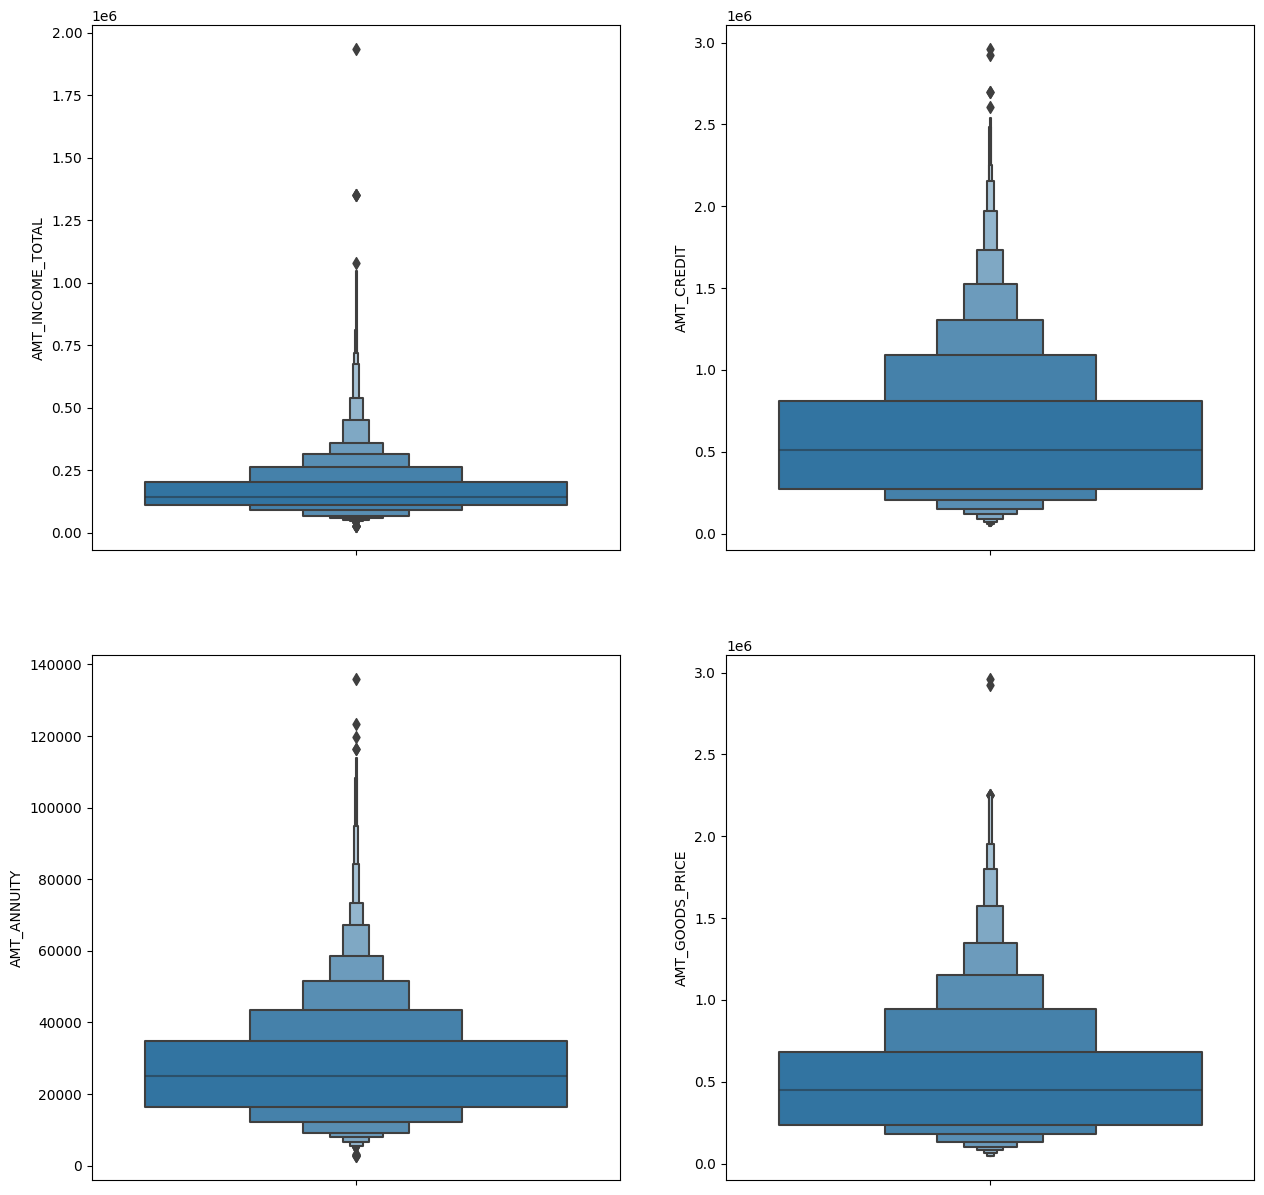

In [44]:
cols= ['AMT_INCOME_TOTAL','AMT_CREDIT', 'AMT_ANNUITY', 'AMT_GOODS_PRICE']
fig,axes = plt.subplots(ncols=2,nrows=2,figsize=(15,15))
count=0
for i in range(0,2):
    for j in range(0,2):
        sns.boxenplot(y=app_data[cols[count]],ax=axes[i,j])
        count+=1
plt.show()

Below Columns have Outliers and those values can be dropped :-

- AMT_INCOME_TOTAL
- AMT_ANNUITY

In [45]:
#Remove Outlier for 'AMT_INCOME_TOTAL' column
app_data=app_data[app_data['AMT_INCOME_TOTAL']<app_data['AMT_INCOME_TOTAL'].max()]

#Remove Outlier for 'AMT_ANNUITY' column
app_data=app_data[app_data['AMT_ANNUITY']<app_data['AMT_ANNUITY'].max()]

#### Analysing CNT_CHILDREN column for Outliers

In [46]:
fig=px.box(app_data['CNT_CHILDREN'])
fig.update_layout(
                    title=dict(text = "Number of children",x=0.5,y=0.95),
                    title_font_size=20,
                    showlegend=False,
                    width =400,
                    height =400,
                  )
fig.show()

In [47]:
app_data['CNT_CHILDREN'].value_counts()

0    6785
1    1952
2     805
3     134
4      10
5       2
7       1
6       1
Name: CNT_CHILDREN, dtype: int64

In [48]:
app_data.shape[0]

9690

In [49]:
# Remove all data points where CNT_CHILDREN is greater than 10
app_data= app_data[app_data['CNT_CHILDREN']<=10]
app_data.shape[0] 

9690

Eight values dropped where number of children are greater than 10

#### Analysing YEARS_EMPLOYED column for Outliers

<Axes: ylabel='YEARS_EMPLOYED'>

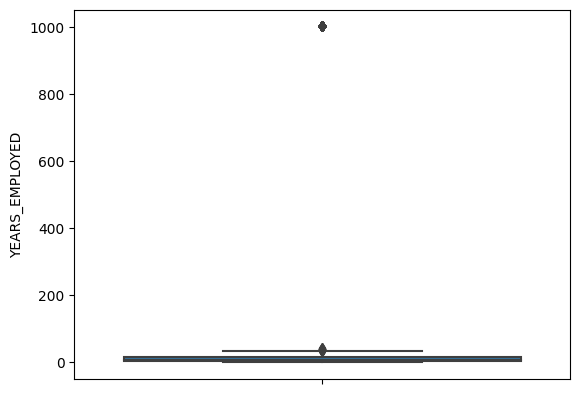

In [50]:
sns.boxplot(y=app_data['YEARS_EMPLOYED'])

In [51]:
app_data['YEARS_EMPLOYED'].value_counts()

1000.665753    1718
1.994521         10
1.561644          9
0.416438          9
3.254795          9
               ... 
9.736986          1
2.778082          1
20.569863         1
11.435616         1
17.495890         1
Name: YEARS_EMPLOYED, Length: 4215, dtype: int64

In [52]:
app_data.shape[0]

9690

In [53]:
app_data['YEARS_EMPLOYED'][app_data['YEARS_EMPLOYED']>1000]=np.NaN

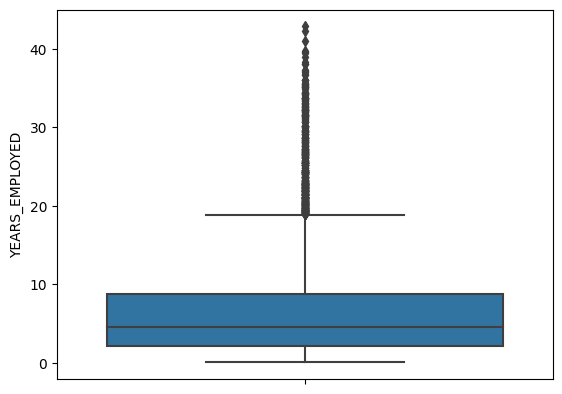

In [54]:
sns.boxplot(y=app_data['YEARS_EMPLOYED'])
plt.show()

In [55]:
app_data.isnull().sum().sort_values(ascending=False).head(10)

Work Experience             1719
ORGANIZATION_TYPE           1719
YEARS_EMPLOYED              1719
DEF_60_CNT_SOCIAL_CIRCLE      41
DEF_30_CNT_SOCIAL_CIRCLE      41
OBS_60_CNT_SOCIAL_CIRCLE      41
OBS_30_CNT_SOCIAL_CIRCLE      41
NAME_TYPE_SUITE               40
EXT_SOURCE_2                  27
DAYS_LAST_PHONE_CHANGE         1
dtype: int64

#### Analyzing AMT_REQ_CREDIT columns for Outliers

In [56]:
cols = [i for i in  app_data.columns if 'AMT_REQ' in i]
cols

['AMT_REQ_CREDIT_BUREAU_HOUR',
 'AMT_REQ_CREDIT_BUREAU_DAY',
 'AMT_REQ_CREDIT_BUREAU_WEEK',
 'AMT_REQ_CREDIT_BUREAU_MON',
 'AMT_REQ_CREDIT_BUREAU_QRT',
 'AMT_REQ_CREDIT_BUREAU_YEAR']

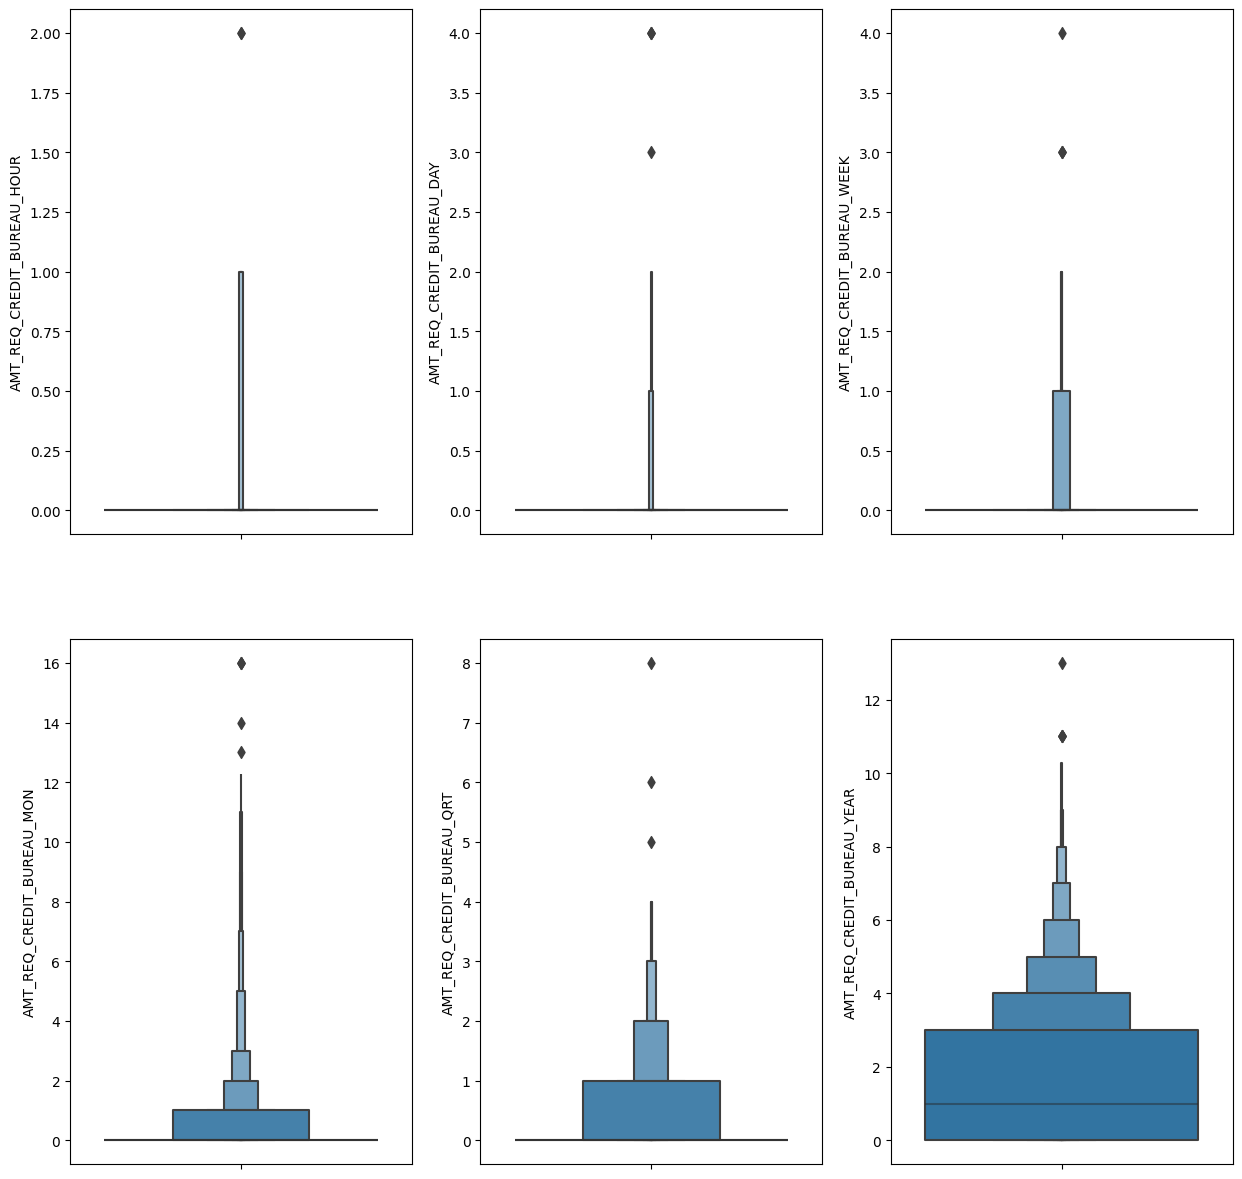

In [57]:
fig,axes = plt.subplots(ncols=3,nrows=2,figsize=(15,15))
count=0
for i in range(0,2):
    for j in range(0,3):
        sns.boxenplot(y=app_data[cols[count]],ax=axes[i,j])
        count+=1
plt.show()

AMT_REQ_CREDIT_BUREAU_QRT contains an outlier

In [58]:
# Remove Outlier for AMT_REQ_CREDIT_BUREAU_QRT
app_data=app_data[app_data['AMT_REQ_CREDIT_BUREAU_QRT']<app_data['AMT_REQ_CREDIT_BUREAU_QRT'].max()]

### Univariate Analysis

In [59]:
app_data.columns

Index(['SK_ID_CURR', 'TARGET', 'NAME_CONTRACT_TYPE', 'CODE_GENDER',
       'CNT_CHILDREN', 'AMT_INCOME_TOTAL', 'AMT_CREDIT', 'AMT_ANNUITY',
       'AMT_GOODS_PRICE', 'NAME_TYPE_SUITE', 'NAME_INCOME_TYPE',
       'NAME_EDUCATION_TYPE', 'NAME_FAMILY_STATUS', 'NAME_HOUSING_TYPE',
       'REGION_POPULATION_RELATIVE', 'DAYS_REGISTRATION', 'DAYS_ID_PUBLISH',
       'OCCUPATION_TYPE', 'CNT_FAM_MEMBERS', 'REGION_RATING_CLIENT',
       'REGION_RATING_CLIENT_W_CITY', 'WEEKDAY_APPR_PROCESS_START',
       'HOUR_APPR_PROCESS_START', 'REG_REGION_NOT_LIVE_REGION',
       'REG_REGION_NOT_WORK_REGION', 'LIVE_REGION_NOT_WORK_REGION',
       'REG_CITY_NOT_LIVE_CITY', 'REG_CITY_NOT_WORK_CITY',
       'LIVE_CITY_NOT_WORK_CITY', 'ORGANIZATION_TYPE', 'EXT_SOURCE_2',
       'EXT_SOURCE_3', 'OBS_30_CNT_SOCIAL_CIRCLE', 'DEF_30_CNT_SOCIAL_CIRCLE',
       'OBS_60_CNT_SOCIAL_CIRCLE', 'DEF_60_CNT_SOCIAL_CIRCLE',
       'DAYS_LAST_PHONE_CHANGE', 'AMT_REQ_CREDIT_BUREAU_HOUR',
       'AMT_REQ_CREDIT_BUREAU_DAY', 'AMT_

In [60]:
fig1=px.bar(app_data['OCCUPATION_TYPE'].value_counts(),color=app_data['OCCUPATION_TYPE'].value_counts())
fig1.update_traces(textposition='outside',marker_coloraxis=None)
fig1.update_xaxes(title='Occupation Type') 
fig1.update_yaxes(title='Count')
fig1.update_layout(
                    title=dict(text = "Occupation Type",x=0.5,y=0.95),
                    title_font_size=20,
                    showlegend=False,
                    height =450,
                  )
fig1.show()

In [61]:
fig2=px.bar(app_data['ORGANIZATION_TYPE'].value_counts(),color=app_data['ORGANIZATION_TYPE'].value_counts())
fig2.update_traces(textposition='outside',marker_coloraxis=None)
fig2.update_xaxes(title='Organization Type') 
fig2.update_yaxes(title='Count')
fig2.update_layout(
                        title=dict(text = "Organization Type",x=0.5,y=0.95),
                    title_font_size=20,
                    showlegend=False,
                    height =450,
                  )
fig2.show()

__Insights__
- Most People who applied for Loan application are Laborers
- Most People who applied for Loan application belong to either __Business Entity Type3__ or __Self-Employed__ Organization Type.

In [62]:
cols = ['Age Group','NAME_CONTRACT_TYPE', 'NAME_INCOME_TYPE','NAME_EDUCATION_TYPE', 
        'NAME_FAMILY_STATUS', 'NAME_HOUSING_TYPE','CODE_GENDER','Work Experience']

#Subplot initialization
fig = make_subplots(
                     rows=4, 
                     cols=2,
                     subplot_titles=cols,
                     horizontal_spacing=0.1,
                     vertical_spacing=0.13 
                   )
# Adding subplots
count=0
for i in range(1,5):
    for j in range(1,3):
        fig.add_trace(go.Bar(x=app_data[cols[count]].value_counts().index, 
                             y=app_data[cols[count]].value_counts(),
                             name=cols[count],
                             textposition='auto',
                             text= [str(i) + '%' for i in (app_data[cols[count]].value_counts(normalize=True)*100).round(1).tolist()],
                            ),
                      row=i,col=j)
        count+=1
fig.update_layout(
                    title=dict(text = "Analyze Categorical variables (Frequency / Percentage)",x=0.5,y=0.99),
                    title_font_size=20,
                    showlegend=False,
                    width = 960,
                    height = 1600,
                  )
fig.show()

__Insights__

- Bank has recieved majority of the loan application from  __30-40__ & __40-50__ Age groups.


- More than __50%__ of clients who have applied for loan belong to __Working Income Type__.


- 88.7% clients with __Secondary/Secondary Special__ education type have applied for the loan.


- Married people tend to apply more for loans. __63.9%__ clients who are have applied for loan are married. 


- Majority of the Clients who have applied for the loan have their own __house/apartment__.  Around 88.7% clients are owning either a house or an apartment.


- __Female__ loan applications are more as compared to __males__. This may be because banks charge less rate of interest for females. 


- Clients with work experience between __0-5__ years have applied most for loan application.


- 90.5% Applicants have requested for Cash loans

In [63]:
app_data.nunique().sort_values()

LIVE_REGION_NOT_WORK_REGION       2
TARGET                            2
NAME_CONTRACT_TYPE                2
CODE_GENDER                       2
REG_REGION_NOT_LIVE_REGION        2
REG_CITY_NOT_LIVE_CITY            2
REG_CITY_NOT_WORK_CITY            2
LIVE_CITY_NOT_WORK_CITY           2
REG_REGION_NOT_WORK_REGION        2
REGION_RATING_CLIENT_W_CITY       3
REGION_RATING_CLIENT              3
AMT_REQ_CREDIT_BUREAU_HOUR        3
AMT_REQ_CREDIT_BUREAU_DAY         5
NAME_FAMILY_STATUS                5
NAME_EDUCATION_TYPE               5
NAME_INCOME_TYPE                  5
AMT_REQ_CREDIT_BUREAU_WEEK        5
AMT_INCOME_TOTAL_Range            5
AMT_CREDIT_Range                  5
AMT_ANNUITY_Range                 5
AMT_GOODS_PRICE_Range             5
Age Group                         5
DEF_60_CNT_SOCIAL_CIRCLE          6
DEF_30_CNT_SOCIAL_CIRCLE          6
NAME_HOUSING_TYPE                 6
AMT_REQ_CREDIT_BUREAU_QRT         7
Work Experience                   7
WEEKDAY_APPR_PROCESS_START  

#### Checking Imbalance

In [64]:
app_data['TARGET'].value_counts(normalize=True)

0    0.922077
1    0.077923
Name: TARGET, dtype: float64

In [65]:
fig=px.pie(values=app_data['TARGET'].value_counts(normalize=True),
           names=app_data['TARGET'].value_counts(normalize=True).index,
           hole = 0.5
          ) 
fig.update_layout(
                    title=dict(text = "Target Imbalance",x=0.5,y=0.95),
                    title_font_size=20,
                    showlegend=False
                  )
fig.show()

In [66]:
app_target0 = app_data.loc[app_data.TARGET == 0]
app_target1 = app_data.loc[app_data.TARGET == 1] 

In [67]:
app_target0.shape

(8934, 51)

In [68]:
app_target1.shape

(755, 51)

In [69]:
cols = ['Age Group','NAME_CONTRACT_TYPE', 'NAME_INCOME_TYPE','NAME_EDUCATION_TYPE']

title = [None]*(2*len(cols))
title[::2]=[i+' (Non-Payment Difficulties)' for i in cols]
title[1::2]=[i+' (Payment Difficulties)' for i in cols]

#Subplot initialization
fig = make_subplots(
                     rows=4, 
                     cols=2,
                     subplot_titles=title,
                   )
# Adding subplots
count=0
for i in range(1,5):
    for j in range(1,3):
        if j==1:
            fig.add_trace(go.Bar(x=app_target0[cols[count]].value_counts().index, 
                             y=app_target0[cols[count]].value_counts(),
                             name=cols[count],
                             textposition='auto',
                             text= [str(i) + '%' for i in (app_target0[cols[count]].value_counts(normalize=True)*100).round(1).tolist()],
                            ),
                      row=i,col=j)
        else:
            fig.add_trace(go.Bar(x=app_target1[cols[count]].value_counts().index, 
                             y=app_target1[cols[count]].value_counts(),
                             name=cols[count],
                             textposition='auto',
                             text= [str(i) + '%' for i in (app_target1[cols[count]].value_counts(normalize=True)*100).round(1).tolist()],
                            ),
                      row=i,col=j)
            count+=1 
fig.update_layout(
                    title=dict(text = "Analyze Categorical variables (Payment/ Non-Payment Difficulties)",x=0.5,y=0.99),
                    title_font_size=20,
                    showlegend=False,
                    height = 1600,
                  )
fig.show()

In [70]:
cols = ['NAME_FAMILY_STATUS', 'NAME_HOUSING_TYPE','CODE_GENDER','Work Experience']

title = [None]*(2*len(cols))
title[::2]=[i+' (Non-Payment Difficulties)' for i in cols]
title[1::2]=[i+' (Payment Difficulties)' for i in cols]

#Subplot initialization
fig = make_subplots(
                     rows=4, 
                     cols=2,
                     subplot_titles=title,
                   )
# Adding subplots
count=0
for i in range(1,5):
    for j in range(1,3):
        if j==1:
            fig.add_trace(go.Bar(x=app_target0[cols[count]].value_counts().index, 
                             y=app_target0[cols[count]].value_counts(),
                             name=cols[count],
                             textposition='auto',
                             text= [str(i) + '%' for i in (app_target0[cols[count]].value_counts(normalize=True)*100).round(1).tolist()],
                            ),
                      row=i,col=j)
        else:
            fig.add_trace(go.Bar(x=app_target1[cols[count]].value_counts().index, 
                             y=app_target1[cols[count]].value_counts(),
                             name=cols[count],
                             textposition='auto',
                             text= [str(i) + '%' for i in (app_target1[cols[count]].value_counts(normalize=True)*100).round(1).tolist()],
                            ),
                      row=i,col=j)
            count+=1 
fig.update_layout(
                    title=dict(text = "Analyze Categorical variables (Payment/ Non-Payment Difficulties)",x=0.5,y=0.99),
                    title_font_size=20,
                    showlegend=False,
                    height = 1600,
                  )
fig.show()

In [71]:
cols = ['OCCUPATION_TYPE', 'ORGANIZATION_TYPE' ,'AMT_INCOME_TOTAL_Range','AMT_CREDIT_Range']

title = [None]*(2*len(cols))
title[::2]=[i+' (Non-Payment Difficulties)' for i in cols]
title[1::2]=[i+' (Payment Difficulties)' for i in cols]

#Subplot initialization
fig = make_subplots(
                     rows=4, 
                     cols=2,
                     subplot_titles=title,
                   )
# Adding subplots
count=0
for i in range(1,5):
    for j in range(1,3):
        if j==1:
            fig.add_trace(go.Bar(x=app_target0[cols[count]].value_counts().index, 
                             y=app_target0[cols[count]].value_counts(),
                             name=cols[count],
                             textposition='auto',
                             text= [str(i) + '%' for i in (app_target0[cols[count]].value_counts(normalize=True)*100).round(1).tolist()],
                            ),
                      row=i,col=j)
        else:
            fig.add_trace(go.Bar(x=app_target1[cols[count]].value_counts().index, 
                             y=app_target1[cols[count]].value_counts(),
                             name=cols[count],
                             textposition='auto',
                             text= [str(i) + '%' for i in (app_target1[cols[count]].value_counts(normalize=True)*100).round(1).tolist()],
                            ),
                      row=i,col=j)
            count+=1 
fig.update_layout(
                    title=dict(text = "Analyze Categorical variables (Payment/ Non-Payment Difficulties)",x=0.5,y=0.99),
                    title_font_size=20,
                    showlegend=False,
                    height = 1600,
                  )
fig.show()

### Bivariate  / Multivariate Analysis

In [72]:
# Group data by 'AMT_CREDIT_Range' & 'CODE_GENDER'
df1=app_data.groupby(by=['AMT_CREDIT_Range','CODE_GENDER']).count().reset_index()[['AMT_CREDIT_Range','CODE_GENDER','SK_ID_CURR']]
df1

,AMT_CREDIT_Range,CODE_GENDER,SK_ID_CURR
0,Very Low,F,1331
1,Very Low,M,609
2,Low,F,1226
3,Low,M,711
4,Medium,F,1272
5,Medium,M,665
6,High,F,1349
7,High,M,625
8,Very High,F,1226
9,Very High,M,675


In [73]:
# Group data by 'AMT_INCOME_TOTAL_Range' & 'CODE_GENDER'
df2=app_data.groupby(by=['AMT_INCOME_TOTAL_Range','CODE_GENDER']).count().reset_index()[['AMT_INCOME_TOTAL_Range','CODE_GENDER','SK_ID_CURR']]
df2 

,AMT_INCOME_TOTAL_Range,CODE_GENDER,SK_ID_CURR
0,Very Low,F,1596
1,Very Low,M,343
2,Low,F,1962
3,Low,M,837
4,Medium,F,724
5,Medium,M,386
6,High,F,1341
7,High,M,978
8,Very High,F,781
9,Very High,M,741


In [74]:
fig1=px.bar(data_frame=df1,
       x='AMT_CREDIT_Range',
       y='SK_ID_CURR',color='CODE_GENDER',
       barmode='group',
       text='SK_ID_CURR'
      )
fig1.update_traces(textposition='outside')
fig1.update_xaxes(title='Day') 
fig1.update_yaxes(title='Transaction count')
fig1.update_layout(
                    title=dict(text = "Loan Applications by Gender & Credit Range",x=0.5,y=0.95),
                    title_font_size=20,
                  )
fig1.show()


__Insights__

- Females are mostly applying for __Very Low__ credit loans.
- Males are applying for __Medium__ & __High__ credit loans.

In [75]:
fig2=px.bar(data_frame=df2,
       x='AMT_INCOME_TOTAL_Range',
       y='SK_ID_CURR',color='CODE_GENDER',
       barmode='group',
       text='SK_ID_CURR'
      )
fig2.update_traces(textposition='outside')
fig2.update_xaxes(title='Day') 
fig2.update_yaxes(title='Transaction count')
fig2.update_layout(
                    title=dict(text = "Loan Applications by Gender & Total Income Range",x=0.5,y=0.95),
                    title_font_size=20,
                  )
fig2.show()

__Insights__

- Females with __Low__ & __Very Low__ total income have applied the most for the loan.

__Education Type VS Credit Amount (Payment / Non Payment Difficulties)__

In [76]:
fig = px.box(app_target0, x="NAME_EDUCATION_TYPE", y="AMT_CREDIT", color='NAME_FAMILY_STATUS', 
             title="Education Type VS Credit Amount (Non Payment Difficulties)")
fig.show()

In [77]:
fig = px.box(app_target1, x="NAME_EDUCATION_TYPE", y="AMT_CREDIT", color='NAME_FAMILY_STATUS', 
             title="Education Type VS Credit Amount (Payment Difficulties)")
fig.show()

__Income VS Credit Amount (Payment / Non Payment Difficulties)__ 

In [78]:
fig = px.box(app_target0, x="AMT_INCOME_TOTAL_Range", y="AMT_CREDIT", color='NAME_FAMILY_STATUS', 
             title="Income Range VS Credit Amount (Non-Payment Difficulties)")
fig.show()

In [79]:
fig = px.box(app_target1, x="AMT_INCOME_TOTAL_Range", y="AMT_CREDIT", color='NAME_FAMILY_STATUS', 
             title="Income Range VS Credit Amount (Payment Difficulties)")
fig.show()

__Age Group VS Credit Amount (Payment / Non Payment Difficulties)__ 

In [80]:
fig = px.box(app_target0, x="Age Group", y="AMT_CREDIT", color='NAME_FAMILY_STATUS', 
             title="Age Group VS Credit Amount (Non-Payment Difficulties)")
fig.show()

In [81]:
fig = px.box(app_target1, x="Age Group", y="AMT_CREDIT", color='NAME_FAMILY_STATUS', 
             title="Age Group VS Credit Amount (Payment Difficulties)")
fig.show()

__Work Experience VS Credit Amount (Payment / Non Payment Difficulties)__ 

In [82]:
fig = px.box(app_target0, x="Work Experience", y="AMT_CREDIT", color='NAME_FAMILY_STATUS', 
             title="Work Experience VS Credit Amount (Non-Payment Difficulties)")
fig.show()

In [83]:
fig = px.box(app_target1, x="Work Experience", y="AMT_CREDIT", color='NAME_FAMILY_STATUS', 
             title="Work Experience VS Credit Amount (Payment Difficulties)")
fig.show()

__Numerical vs Numerical Variables__

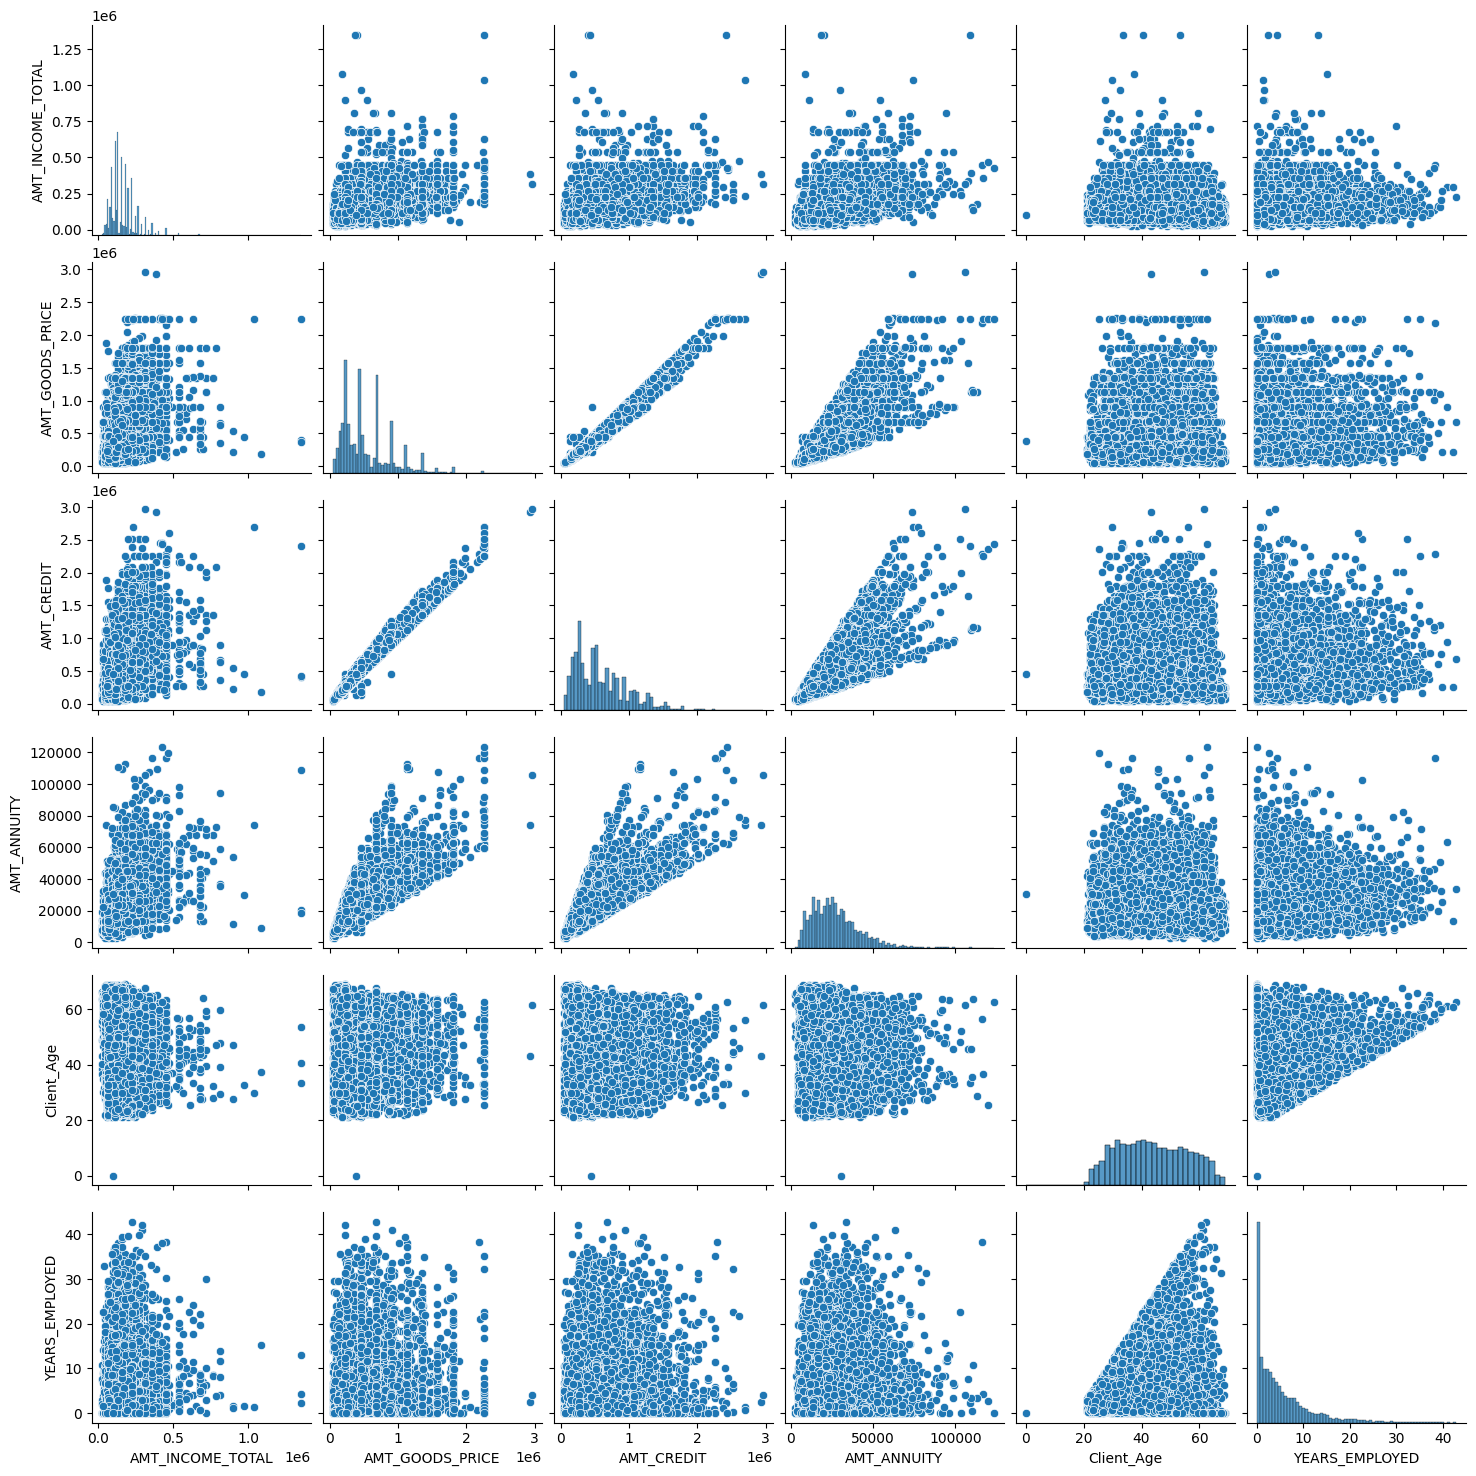

In [84]:
sns.pairplot(app_data[['AMT_INCOME_TOTAL', 'AMT_GOODS_PRICE', 
                       'AMT_CREDIT', 'AMT_ANNUITY',
                       'Client_Age','YEARS_EMPLOYED' ]].fillna(0))
plt.show()

__Correlation in target0 & target1__

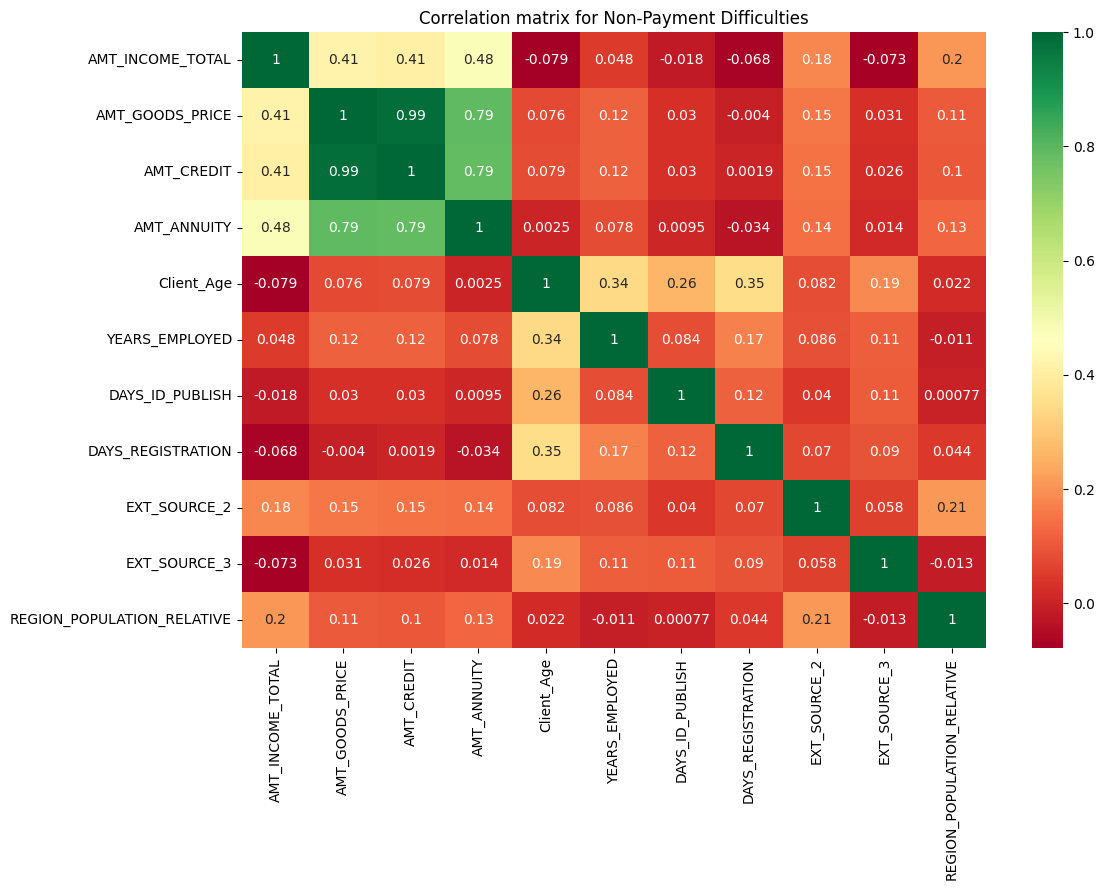

In [85]:
plt.figure(figsize=(12,8)) 
sns.heatmap(app_target0[['AMT_INCOME_TOTAL', 'AMT_GOODS_PRICE', 
                       'AMT_CREDIT', 'AMT_ANNUITY',
                       'Client_Age','YEARS_EMPLOYED' ,
                       'DAYS_ID_PUBLISH', 'DAYS_REGISTRATION',
                       'EXT_SOURCE_2','EXT_SOURCE_3','REGION_POPULATION_RELATIVE']].corr(), annot=True, cmap="RdYlGn")
plt.title('Correlation matrix for Non-Payment Difficulties')
plt.show()

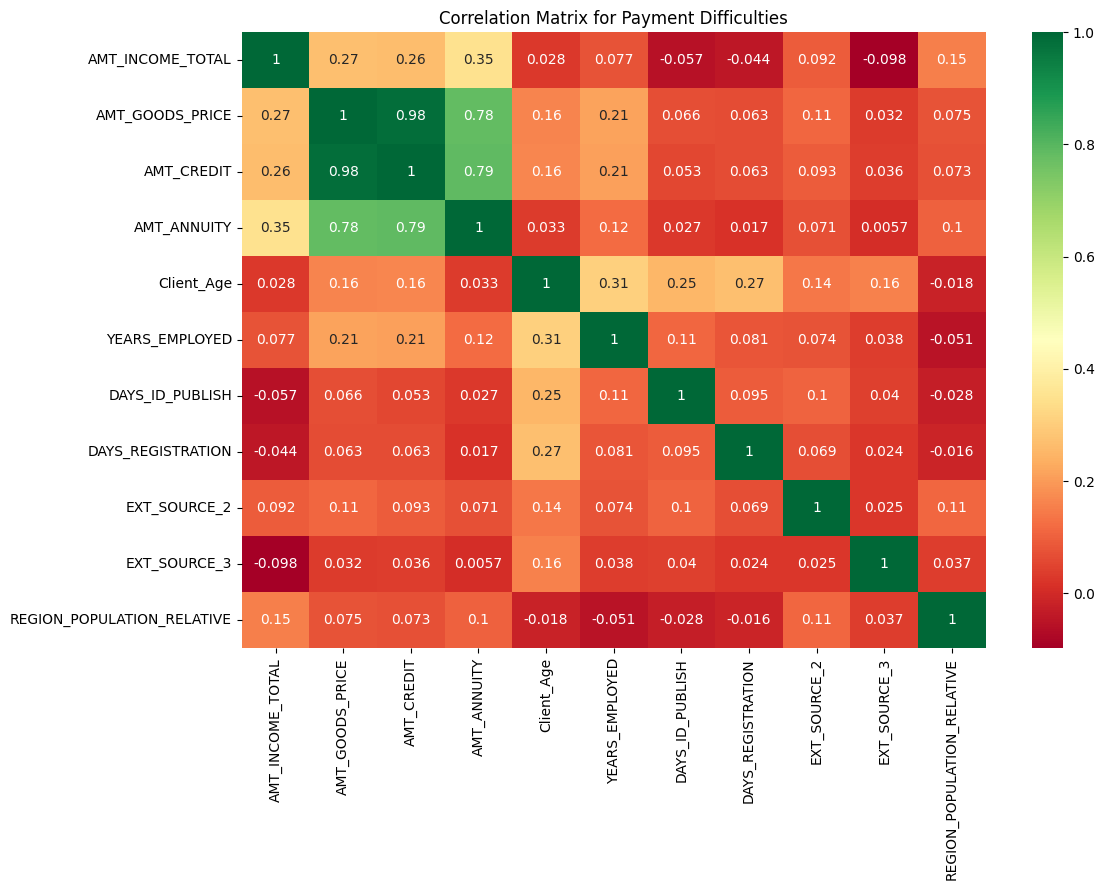

In [86]:
plt.figure(figsize=(12,8)) 
sns.heatmap(app_target1[['AMT_INCOME_TOTAL', 'AMT_GOODS_PRICE', 
                       'AMT_CREDIT', 'AMT_ANNUITY',
                       'Client_Age','YEARS_EMPLOYED' ,
                       'DAYS_ID_PUBLISH', 'DAYS_REGISTRATION',
                       'EXT_SOURCE_2','EXT_SOURCE_3','REGION_POPULATION_RELATIVE']].corr(), annot=True, cmap='RdYlGn')
plt.title('Correlation Matrix for Payment Difficulties')
plt.show()

### Data Analysis on Previous Application dataset

In [88]:
appdata_previous = pd.read_csv("previous_application.csv");
appdata_previous.head()

,SK_ID_PREV,SK_ID_CURR,NAME_CONTRACT_TYPE,AMT_ANNUITY,AMT_APPLICATION,AMT_CREDIT,AMT_DOWN_PAYMENT,AMT_GOODS_PRICE,WEEKDAY_APPR_PROCESS_START,HOUR_APPR_PROCESS_START,...,NAME_SELLER_INDUSTRY,CNT_PAYMENT,NAME_YIELD_GROUP,PRODUCT_COMBINATION,DAYS_FIRST_DRAWING,DAYS_FIRST_DUE,DAYS_LAST_DUE_1ST_VERSION,DAYS_LAST_DUE,DAYS_TERMINATION,NFLAG_INSURED_ON_APPROVAL
0,2030495,271877,Consumer loans,1730.430,17145.0,17145.0,0.0,17145.0,SATURDAY,15,...,Connectivity,12.0,middle,POS mobile with interest,365243.0,-42.0,300.0,-42.0,-37.0,0.0
1,2802425,108129,Cash loans,25188.615,607500.0,679671.0,NaN,607500.0,THURSDAY,11,...,XNA,36.0,low_action,Cash X-Sell: low,365243.0,-134.0,916.0,365243.0,365243.0,1.0
2,2523466,122040,Cash loans,15060.735,112500.0,136444.5,NaN,112500.0,TUESDAY,11,...,XNA,12.0,high,Cash X-Sell: high,365243.0,-271.0,59.0,365243.0,365243.0,1.0
3,2819243,176158,Cash loans,47041.335,450000.0,470790.0,NaN,450000.0,MONDAY,7,...,XNA,12.0,middle,Cash X-Sell: middle,365243.0,-482.0,-152.0,-182.0,-177.0,1.0
4,1784265,202054,Cash loans,31924.395,337500.0,404055.0,NaN,337500.0,THURSDAY,9,...,XNA,24.0,high,Cash Street: high,NaN,NaN,NaN,NaN,NaN,NaN


__Drop Columns with NULL Values greater than 40%__

In [89]:
s1= (appdata_previous.isnull().mean()*100).sort_values(ascending=False)[appdata_previous.isnull().mean()*100 > 40]
s1

RATE_INTEREST_PRIMARY       99.663947
RATE_INTEREST_PRIVILEGED    99.663947
AMT_DOWN_PAYMENT            50.852672
RATE_DOWN_PAYMENT           50.852672
NAME_TYPE_SUITE             48.525380
dtype: float64

In [90]:
appdata_previous.shape

(119624, 37)

In [91]:
appdata_previous.drop(columns = s1.index,inplace=True)

In [92]:
appdata_previous.shape

(119624, 32)

__Changing negative values in the DAYS columns to positive values__

In [93]:
days = []
for i in appdata_previous.columns:
    if 'DAYS' in i:
        days.append(i)
        print('Unique Values in {0} column : {1}'.format(i,appdata_previous[i].unique()))
        print()

Unique Values in DAYS_DECISION column : [  -73  -164  -301 ... -2262 -1967 -2389]

Unique Values in DAYS_FIRST_DRAWING column : [ 3.65243e+05          nan -2.77000e+02 ... -1.22800e+03 -4.60000e+01
 -2.44200e+03]

Unique Values in DAYS_FIRST_DUE column : [  -42.  -134.  -271. ... -2819. -2842. -1774.]

Unique Values in DAYS_LAST_DUE_1ST_VERSION column : [ 300.  916.   59. ... 1433. 1285. 1342.]

Unique Values in DAYS_LAST_DUE column : [-4.20000e+01  3.65243e+05 -1.82000e+02 ... -2.79600e+03 -2.88400e+03
 -2.70500e+03]

Unique Values in DAYS_TERMINATION column : [-3.70000e+01  3.65243e+05 -1.77000e+02 ... -2.79800e+03 -2.70900e+03
 -2.69400e+03]



In [94]:
appdata_previous[days]= abs(appdata_previous[days])

In [95]:
appdata_previous[days]

,DAYS_DECISION,DAYS_FIRST_DRAWING,DAYS_FIRST_DUE,DAYS_LAST_DUE_1ST_VERSION,DAYS_LAST_DUE,DAYS_TERMINATION
0,73,365243.0,42.0,300.0,42.0,37.0
1,164,365243.0,134.0,916.0,365243.0,365243.0
2,301,365243.0,271.0,59.0,365243.0,365243.0
3,512,365243.0,482.0,152.0,182.0,177.0
4,781,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...
119619,1872,365243.0,1841.0,1511.0,1511.0,1509.0
119620,2631,365243.0,2600.0,2270.0,2270.0,2264.0
119621,305,NaN,NaN,NaN,NaN,NaN
119622,1084,365243.0,1052.0,782.0,782.0,775.0


In [96]:
# Replcae XNA and XAP are replaced by NaN
appdata_previous=appdata_previous.replace('XNA', np.NaN)
appdata_previous=appdata_previous.replace('XAP', np.NaN)

__Univariate Analysis on Previous Application Data__

In [97]:
appdata_previous.columns

Index(['SK_ID_PREV', 'SK_ID_CURR', 'NAME_CONTRACT_TYPE', 'AMT_ANNUITY',
       'AMT_APPLICATION', 'AMT_CREDIT', 'AMT_GOODS_PRICE',
       'WEEKDAY_APPR_PROCESS_START', 'HOUR_APPR_PROCESS_START',
       'FLAG_LAST_APPL_PER_CONTRACT', 'NFLAG_LAST_APPL_IN_DAY',
       'NAME_CASH_LOAN_PURPOSE', 'NAME_CONTRACT_STATUS', 'DAYS_DECISION',
       'NAME_PAYMENT_TYPE', 'CODE_REJECT_REASON', 'NAME_CLIENT_TYPE',
       'NAME_GOODS_CATEGORY', 'NAME_PORTFOLIO', 'NAME_PRODUCT_TYPE',
       'CHANNEL_TYPE', 'SELLERPLACE_AREA', 'NAME_SELLER_INDUSTRY',
       'CNT_PAYMENT', 'NAME_YIELD_GROUP', 'PRODUCT_COMBINATION',
       'DAYS_FIRST_DRAWING', 'DAYS_FIRST_DUE', 'DAYS_LAST_DUE_1ST_VERSION',
       'DAYS_LAST_DUE', 'DAYS_TERMINATION', 'NFLAG_INSURED_ON_APPROVAL'],
      dtype='object')

In [98]:
cols = ['NAME_CONTRACT_STATUS','WEEKDAY_APPR_PROCESS_START', 
        'NAME_PAYMENT_TYPE','CODE_REJECT_REASON', 
        'NAME_CONTRACT_TYPE','NAME_CLIENT_TYPE']

#Subplot initialization
fig = make_subplots(
                     rows=3, 
                     cols=2,
                     subplot_titles=cols,
                     horizontal_spacing=0.1,
                     vertical_spacing=0.17 
                   )
# Adding subplots
count=0
for i in range(1,4):
    for j in range(1,3):
        fig.add_trace(go.Bar(x=appdata_previous[cols[count]].value_counts().index, 
                             y=appdata_previous[cols[count]].value_counts(),
                             name=cols[count],
                             textposition='auto',
                             text= [str(i) + '%' for i in (appdata_previous[cols[count]].value_counts(normalize=True)*100).round(1).tolist()],
                            ),
                      row=i,col=j)
        count+=1
fig.update_layout(
                    title=dict(text = "Analyze Categorical variables (Frequency / Percentage)",x=0.5,y=0.99),
                    title_font_size=20,
                    showlegend=False,
                    width = 960,
                    height = 1200,
                  )
fig.show()

#### Approved Loans

In [99]:
approved=appdata_previous[appdata_previous['NAME_CONTRACT_STATUS']=='Approved']

In [100]:
cols = ['NAME_PORTFOLIO','NAME_GOODS_CATEGORY',
        'CHANNEL_TYPE','NAME_YIELD_GROUP' , 'NAME_PRODUCT_TYPE','NAME_CASH_LOAN_PURPOSE']

#Subplot initialization
fig = make_subplots(
                     rows=3, 
                     cols=2,
                     subplot_titles=cols,
                     horizontal_spacing=0.1,
                     vertical_spacing=0.19 
                   )
# Adding subplots
count=0
for i in range(1,4):
    for j in range(1,3):
        fig.add_trace(go.Bar(x=approved[cols[count]].value_counts().index, 
                             y=approved[cols[count]].value_counts(),
                             name=cols[count],
                             textposition='auto',
                             text= [str(i) + '%' for i in (approved[cols[count]].value_counts(normalize=True)*100).round(1).tolist()],
                            ),
                      row=i,col=j)
        count+=1
fig.update_layout(
                    title=dict(text = "Analyze Categorical variables (Frequency / Percentage)",x=0.5,y=0.99),
                    title_font_size=20,
                    showlegend=False,
                    width = 960,
                    height = 1400,
                  )
fig.show()

#### Refused Loans

In [101]:
refused=appdata_previous[appdata_previous['NAME_CONTRACT_STATUS']=='Refused']

In [102]:
cols = ['NAME_PORTFOLIO','NAME_GOODS_CATEGORY',
        'CHANNEL_TYPE','NAME_YIELD_GROUP' , 'NAME_PRODUCT_TYPE','NAME_CASH_LOAN_PURPOSE']

#Subplot initialization
fig = make_subplots(
                     rows=3, 
                     cols=2,
                     subplot_titles=cols,
                     horizontal_spacing=0.1,
                     vertical_spacing=0.19 
                   )
# Adding subplots
count=0
for i in range(1,4):
    for j in range(1,3):
        fig.add_trace(go.Bar(x=refused[cols[count]].value_counts().index, 
                             y=refused[cols[count]].value_counts(),
                             name=cols[count],
                             textposition='auto',
                             text= [str(i) + '%' for i in (refused[cols[count]].value_counts(normalize=True)*100).round(1).tolist()],
                            ),
                      row=i,col=j)
        count+=1
fig.update_layout(
                    title=dict(text = "Analyze Categorical variables (Frequency / Percentage)",x=0.5,y=0.99),
                    title_font_size=20,
                    showlegend=False,
                    width = 960,
                    height = 1400,
                  )
fig.show()

## Merging Application & Previous Application Data

In [103]:
appdata_merge = app_data.merge(appdata_previous,on='SK_ID_CURR', how='inner')
appdata_merge.shape

(3230, 82)

__Analysis of Merged Data__

In [104]:
# Function for multiple plotting - Bar Chart
def plot_merge(appdata_merge,column_name):
    col_value = ['Refused','Approved', 'Canceled' , 'Unused offer']
    
    #Subplot initialization
    fig = make_subplots(
                     rows=2, 
                     cols=2,
                     subplot_titles=col_value,
                     horizontal_spacing=0.1,
                     vertical_spacing=0.3
                   )
    # Adding subplots
    count=0
    for i in range(1,3):
        for j in range(1,3):
            fig.add_trace(go.Bar(x=appdata_merge[appdata_merge['NAME_CONTRACT_STATUS']==col_value[count]][column_name].value_counts().index, 
                             y=appdata_merge[appdata_merge['NAME_CONTRACT_STATUS']==col_value[count]][column_name].value_counts(),
                             name=cols[count],
                             textposition='auto',
                             text= [str(i) + '%' for i in (appdata_merge[appdata_merge['NAME_CONTRACT_STATUS']==col_value[count]][column_name].value_counts(normalize=True)*100).round(1).tolist()],
                            ),
                      row=i,col=j)
            count+=1
    fig.update_layout(
                    title=dict(text = "NAME_CONTRACT_STATUS VS "+column_name,x=0.5,y=0.99),
                    title_font_size=20,
                    showlegend=False,
                    width = 960,
                    height = 960,
                  )
    fig.show()

In [105]:
# Function for multiple plotting - Pie Chart
def plot_pie_merge(appdata_merge,column_name):
    col_value = ['Refused','Approved', 'Canceled' , 'Unused offer']
    
    #Subplot initialization
    fig = make_subplots(
                     rows=2, 
                     cols=2,
                     subplot_titles=col_value,
                     specs=[[{"type": "pie"}, {"type": "pie"}],[{"type": "pie"}, {"type": "pie"}]],
                   )
    # Adding subplots
    count=0
    for i in range(1,3):
        for j in range(1,3):
            fig.add_trace(go.Pie(labels=appdata_merge[appdata_merge['NAME_CONTRACT_STATUS']==col_value[count]][column_name].value_counts().index, 
                             values=appdata_merge[appdata_merge['NAME_CONTRACT_STATUS']==col_value[count]][column_name].value_counts(),
                             textinfo='percent',
                             insidetextorientation='auto',
                             hole=.3
                            ),
                      row=i,col=j)
            count+=1
    fig.update_layout(
                    title=dict(text = "NAME_CONTRACT_STATUS VS "+column_name,x=0.5,y=0.99),
                    title_font_size=20,
                    width = 960,
                    height = 960,
                  )
    fig.show()

In [106]:
plot_pie_merge(appdata_merge,'NAME_CONTRACT_TYPE_y')

__Insights__

- Banks mostly approve Consumer Loans
- Most of the __Refused_ & __Cancelled__ loans are __cash loans__.

In [107]:
plot_pie_merge(appdata_merge,'NAME_CLIENT_TYPE')

__Insights__

- Most of the approved , refused & canceled loans belong to the old clients.
- Almost __27.4%__ loans were provided to new customers.

In [108]:
plot_pie_merge(appdata_merge,'CODE_GENDER')

__Insights__

- Approved percentage of loans provided to females is more as compared to refused percentage.

In [109]:
plot_merge(appdata_merge,'NAME_EDUCATION_TYPE')

__Insights__

- Most of the approved loans belong to applicants with __Secondary / Secondary Special__ education type.

In [110]:
plot_merge(appdata_merge,'NAME_INCOME_TYPE')

__Insights__

- Across all Contract Status (Approved , Refused , Canceled , Unused Offer) people with __Working__ income type are leading. So it is quite evident that majority of the loans are coming from this income type class.

In [111]:
plot_pie_merge(appdata_merge,'NAME_FAMILY_STATUS')

__Insights__

- Approved percentage of loans for married applicants is higher than the rest of the contract status (refused , canceled etc.).

In [112]:
plot_pie_merge(appdata_merge,'NAME_PORTFOLIO')

__Insights__

- 60.6% previous approved loans belong to __POS__ name portfolio.
- Majority of the loans refused were cash loans.
- 93.4% loans that belong to __POS__ were canceled 

In [113]:
plot_merge(appdata_merge,'OCCUPATION_TYPE')

In [114]:
plot_merge(appdata_merge,'NAME_GOODS_CATEGORY')

In [115]:
plot_merge(appdata_merge,'PRODUCT_COMBINATION')

__Insights__

- Most of the approved loans belong to __POS hosehold with interest__ & __POS mobile with interest__ product combination.

- 15% refused loans belong to __Cash X-Sell: low__ product combination.

- Most of the canceled loans belong to __Cash__ category.

- 81.3% __Unused Offer__ loans belong to POS mobile with interest.

In [116]:
plot_merge(appdata_merge,'NAME_PAYMENT_TYPE')

In [117]:
plot_merge(appdata_merge,'CHANNEL_TYPE')

__Insights__

- Most of the approved loans belong to either __Country-wide__ or __Credit & cash offices__ channel type.

- More than 50% refused loans belong to  __Credit & cash offices__ channel type.

- __Credit & cash offices__ channel type loans are getting canceled the most.

- More than 90% __Unused Offer__ loans belong to Country-wide channel type.


In [118]:
plot_pie_merge(appdata_merge,'NAME_YIELD_GROUP')

__Insights__

- Most of the approved loans have medium grouped interest rate.

- Loans with low or normal interest rate are getting refused or canceled the most.

In [119]:
plot_pie_merge(appdata_merge,'NAME_HOUSING_TYPE')

In [120]:
plot_merge(appdata_merge,'Age Group')

In [121]:
plot_merge(appdata_merge,'Work Experience')

In [122]:
plot_merge(appdata_merge,'AMT_CREDIT_Range')

__Insights__

- Most of the approved loans belong to __Very Low__ & __High__ Credit range.

- __Medium & Very Low__ credit range loans are canceled and rejected the most.

In [123]:
plot_merge(appdata_merge,'AMT_INCOME_TOTAL_Range')

__Insights__

- Most of the loans are getting approved for Applicants with __Low__ Income range. May be they are opting for low credit loans.

- Almost 28% loan applications are either getting rejected or canceled even though applicant belong to HIGH Income range. May be they have requested for quite HIGH credit range.

# END